<a href="https://colab.research.google.com/github/kyoheiii/u-nag_BS-ML-study-group/blob/main/%E7%A0%94%E7%A9%B6%E4%BC%9A/%E7%AC%AC%E4%BA%94%E5%9B%9E%E3%83%99%E3%82%A4%E3%82%BA%E7%B5%B1%E8%A8%88%E5%AD%A6%E3%83%BB%E6%A9%9F%E6%A2%B0%E5%AD%A6%E7%BF%92%E7%A0%94%E7%A9%B6%E4%BC%9A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

このノートブックでは、MCMC（マルコフ連鎖モンテカルロ）について記述する。


目次
1.   MCMCとは
2.   モンテカルロ法とは
3.   モンテカルロ法の弱点
4.   マルコフ連鎖を用いたモンテカルロ法の改良



##1.MCMCとは

**MCMC（マルコフ連鎖モンテカルロ）**とは、ベイズ統計学で事後分布や事後確率
の計算を行うためのシミュレーション方法。

　事後分布の形が複雑になったり、求めたいパラメータの個数が非常に多いときには周辺事後分布の積分の計算が困難になることが多いため、ランダムに点を打ち分布の**パラメータの近似値を求める**。

　ギブスサンプラー、 M-H アルゴリズム、ハミルトニアンモンテカルロなどの手法がある。


##2.モンテカルロ法とは

　モンテカルロ法とはシミュレーションや数値計算を乱数を用いて行う手法。

円周率の近似値を求める例が有名。

下のコードを実行してみましょう。

１．1x1の正方形の中に半径1の円の4分の1を描く

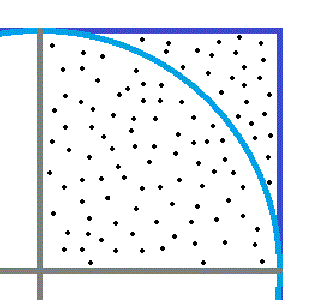

２．正方形の中にランダムに点を打つ

３．円の中に入った点と入らなかった点の数を比から円周率を求める

3.164


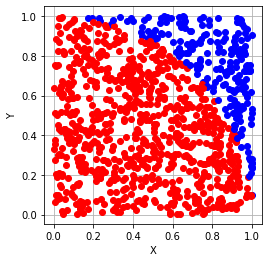

In [ ]:
import random
import matplotlib.pyplot as plt


point = 0
#Nは点を打つ回数を表しています。書き換えると結果が変わります。
N = 1000 
for i in range(N):
    x = random.random()
    y = random.random()

    if x*x+y*y < 1.0:
       point += 1
       plt.plot(x, y,"ro")
    else:
       plt.plot(x, y,"bo")
    
    # 円周率の近似解
    pi = 4.0 * point / N

print(pi)

plt.gca().set_aspect('equal',adjustable='box')

plt.grid(True)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

##もう少し詳しく

**正方形S1**の面積は1x1で1なので
$$
S_1 = r^2 =1
$$
四分割された**円S2**の面積は,円の面積**「半径 x 半径 x 円周率」の４分の１**なので
$$ 
S_2 =  \frac{1}{4}\pi r^2 = \frac{1}{4}\pi
$$

上記で求まった**「4分割された円の面積S2」**から**「正方形の面積S1」**を割ることで

円に入った点の数Pと正方形に入った点の数Nの割合**P/N**が求められる

$$
 \frac{S_2}{S_1} = \frac{\frac{1}{4}\pi}{1} = \frac{1}{4}\pi \\ \frac{1}{4}\pi = \frac{P}{N}
$$
これをπについて解くと
$$
\pi = \frac{4P}{N}
$$

##3.モンテカルロ法の弱点

**次元の呪い**：データの次元が大きくなると、そのデータを分析する際の計算量が指数関数的に増大する現象

　この問題はモンテカルロ法でも起こる。モンテカルロ法では面積を求めたい立体が高次元になると、求めたい立体の面積に対してそれ以外の部分の面積が大きくなってしまうため求めたい部分に点が当たらない。

→**複雑な尤度関数には使えない！！**

##4.マルコフ連鎖を用いたモンテカルロ法の改良

　マルコフ連鎖とは：時刻 t+1 の状態が，時刻 t の状態のみに依存する（時刻 t−1 以前の状態には依存しない）ようなモデル。

→**直前の状態のみを参考に次の状態が決まるモデル。**

　この性質をモンテカルロ法の弱点克服に使う。

→求めたい部分に点が入った時はその周辺に次の点を打つ。求めたい部分でなければ、再度ランダムに点を打つことでモンテカルロ法の弱点を克服

良かったら見てね


*   MCMCについておじちゃんが教えてくれる動画 

> https://www.youtube.com/watch?v=-H28H1unn0M&t=323s


*   本物のホールケーキにカラースプレーを振りかけて円周率を求める動画


> https://www.youtube.com/watch?v=Ymtb47ZfMgI&t=184s

*   ベイズ統計学が実務でどのように使われているかわかる動画。初めのスピーカーの発表と最後の雑談が参考になります。


> https://www.youtube.com/watch?v=7rBI11Rze2c





